# Supervised Learning

## Coding A Decision Tree

In [5]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)







#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())

ImportError: No module named class_vis

In [4]:
from sklearn import tree

def classify(features_train, labels_train):
    
    clf = tree.DecisionTreeClassifier()
    
    clf = clf.fit(features_train, labels_train)
    
    ### your code goes here--should return a trained decision tree classifer

    
    
    return clf

## regression

In [7]:
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [17]:
import numpy
import matplotlib.pyplot as plt

# from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0] ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0] ### fill in the line of code to get the right value
### get the score on test data
test_score = reg.score(ages_test,net_worths_test) ### fill in the line of code to get the right value
### get the score on the training data
training_score = reg.score(ages_train,net_worths_train) ### fill in the line of code to get the right value




def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

submitFit()

{'intercept': -14.353783307755521,
 'networth': 160.43205453082507,
 'slope': 6.4735495495770587,
 'stats on test': 0.81236572923084704,
 'stats on training': 0.87458823582171863}

In [18]:
#
#
# Regression and Classification programming exercises
#
#


#
#	In this exercise we will be taking a small data set and computing a linear function
#	that fits it, by hand.
#	

#	the data set

import numpy as np

sleep = [5,6,7,8,10]
scores = [65,51,75,75,86]


def compute_regression(sleep,scores):

    #	First, compute the average amount of each list

    avg_sleep = np.mean(sleep)
    avg_scores = np.mean(scores)

    #	Then normalize the lists by subtracting the mean value from each entry

    normalized_sleep = sleep - avg_sleep
    normalized_scores = scores - avg_scores

    #	Compute the slope of the line by taking the sum over each student
    #	of the product of their normalized sleep times their normalized test score.
    #	Then divide this by the sum of squares of the normalized sleep times.

    slope = np.sum(normalized_sleep) / np.sum(normalized_scores)

    #	Finally, We have a linear function of the form
    #	y - avg_y = slope * ( x - avg_x )
    #	Rewrite this function in the form
    #	y = m * x + b
    #	Then return the values m, b
    m = slope
    b = avg_scores - slope * avg_sleep

    return m,b


if __name__=="__main__":
    m,b = compute_regression(sleep,scores)
    print "Your linear model is y={}*x+{}".format(m,b)

Your linear model is y=0.03125*x+70.175


In [31]:
#
#
# Regression and Classification programming exercises
#
#


#
#	In this exercise we will be taking a small data set and computing a linear function
#	that fits it, by hand.
#	

#	the data set

import numpy as np

sleep = [5,6,7,8,10]
scores = [65,51,75,75,86]


def compute_regression(sleep,scores):

    #	First, compute the average amount of each list

    avg_sleep = np.mean(sleep)
    avg_scores = np.mean(scores)

    #	Then normalize the lists by subtracting the mean value from each entry

    normalized_sleep = sleep - avg_sleep
    normalized_scores = scores - avg_scores

    #	Compute the slope of the line by taking the sum over each student
    #	of the product of their normalized sleep times their normalized test score.
    #	Then divide this by the sum of squares of the normalized sleep times.

    slope =  np.sum(normalized_sleep * normalized_scores) / np.sum(np.square(normalized_sleep))


    #	Finally, We have a linear function of the form
    #	y - avg_y = slope * ( x - avg_x )
    #	Rewrite this function in the form
    #	y = m * x + b
    #	Then return the values m, b
    m = slope
    b = avg_scores - slope * avg_sleep

    return m,b


if __name__=="__main__":
    m,b = compute_regression(sleep,scores)
    print "Your linear model is y={}*x+{}".format(m,b)

Your linear model is y=5.51351351351*x+30.7027027027


In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [2]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    from sklearn.naive_bayes import GaussianNB
    
    clf = GaussianNB()
    clf = clf.fit(features_train, labels_train)
    
    return clf
        
    ### your code goes here!
    


In [3]:
#!/usr/bin/python

#from udacityplots import *
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJztnXt8VNW597+TMBDCXVJ6SEAuAgaQq0a0FRAvULyQeqyS\no2JFlLZK0Z6et+qpbeOxb98DPeeoFWzRglYtYK/EqmCPXMQrERFQLKIioYSiBIrYgLnNvH/sTDIz\nmcue2be19jzfz4fPMJOdvdesvbN+63nW8zwrEA6HwwiCIAiCZuR53QBBEARByAYRMEEQBEFLRMAE\nQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TA\nBEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtE\nwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFL\nRMAEQRAELREBEwRBELSkk9cNcIpAIOB1EwRBELQkHA573QRT+FbAACq9boBCbASmed0IRZC+iMXt\n/igEbgeCUZ81A78Ajlg8TxNwP3DCQvtS9YeVaxYCvYFjFtuXDaOBrwL5QPTUPgxsAF6O+qzSvWZZ\nRlyIgiC4ygmgCmPgb8QYREPANzAGWrP0BlriPmtp/dwprFzzBHAQ98ULYBfGBCG+7c3ANvebYxsi\nYEIMhUBx66uQHumv7NgFLMMYgAJAZwyrphzzfXkMw6KIJr/1c6fw4pp2cQRYgzFx+Lz1tQpvBNUu\nfO1CFNoZbOKY0RgDSAvGH2UVxkDjNwbbdB6/9Ndgj67bBcMCiB6EItaMmUE1YsnF3wOrA/JgD67p\nFruAj/DOlWk3ImA5wpA0Py

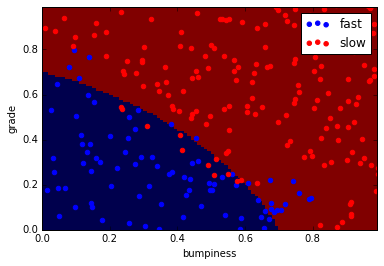

In [6]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


import numpy as np
import pylab as pl

%matplotlib inline


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())






In [10]:


0.05/0.35

0.14285714285714288